# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [57]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(X)
y_pred=kmeans.predict(X)  #se aseigna a cada punto una etiqueta del cluster

In [60]:
y_pred

array([0, 0, 3, 4, 2, 4, 3, 3, 0, 0, 4, 3, 3, 0, 4, 3, 3, 0, 4, 5, 2, 2,
       0, 0, 5, 5, 3, 3, 5, 0, 3, 4, 0, 3, 0, 5, 5, 0, 0, 2, 5, 0, 0, 2,
       5, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 1, 2, 1, 7, 6, 6, 2,
       1, 1, 2, 2, 5, 6, 1, 0, 5, 1, 6, 1, 2, 1, 6, 2, 7, 1, 1, 1, 1, 7,
       2, 7, 1, 1, 1, 6, 6, 5, 7, 1, 2, 6, 2, 7, 1, 6, 2, 6, 1, 1, 6, 2,
       7, 6, 7, 1, 6, 6, 1, 6, 6, 7, 7, 1, 6, 6, 6, 6, 6, 1, 6, 7, 7, 1,
       7, 7, 7, 2, 2, 1, 7, 7, 7, 2, 1, 7, 5, 5, 6, 7, 7, 7, 1, 1, 1, 2,
       7, 2, 1, 5, 2, 7, 1, 2, 7, 2, 7, 1, 2, 2, 2, 7, 1, 1, 2, 2, 2, 5,
       5, 7])

Score 
- Medida de calidad de la agrupación
- rango [-1,1] por lo tanto 0,54 bueeeeno no está tan mal

In [61]:
from sklearn.metrics import silhouette_score

silhouette_score(X, y_pred)

0.5398971441034115

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [62]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
y_pred=kmeans.predict(X)

In [63]:
silhouette_score(X, y_pred)

0.5489993239795675

Este mejor

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [64]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
y_pred=kmeans.predict(X)

In [65]:
silhouette_score(X, y_pred)

0.5711381937868838

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [66]:
from sklearn.cluster import KMeans

n_clusters, inertia = zip(*[(k, KMeans(n_clusters=k).fit(X).inertia_) for k in range(1, 10)])


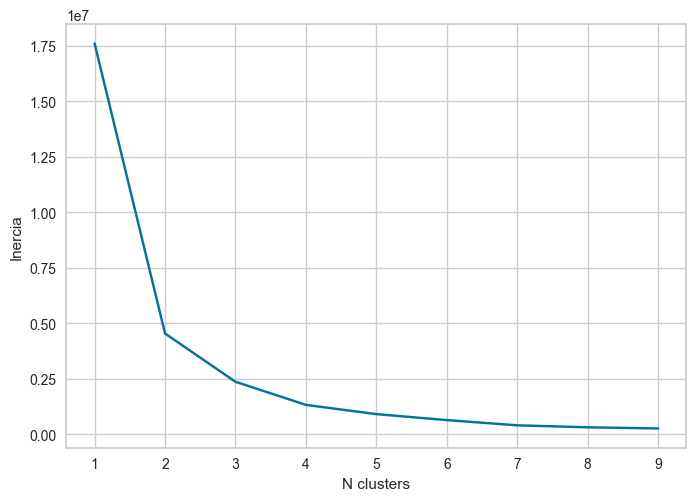

In [67]:
fig=plt.figure()

ax=fig.add_subplot()

ax.plot(n_clusters, inertia)

plt.xlabel('N clusters')
plt.ylabel('Inercia');

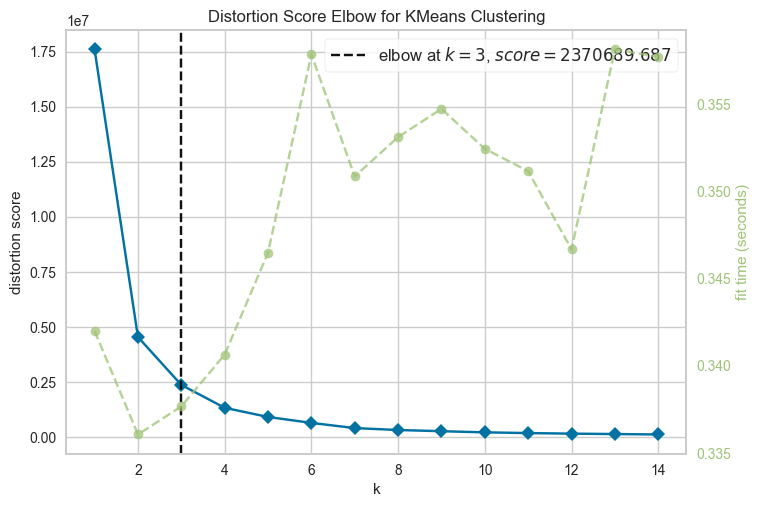

In [68]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

modelo = KMeans()

#se almacenan las puntuaciones de la métrica de evaluación
#para cada valor de k

visual = KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)

visual.poof();


## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

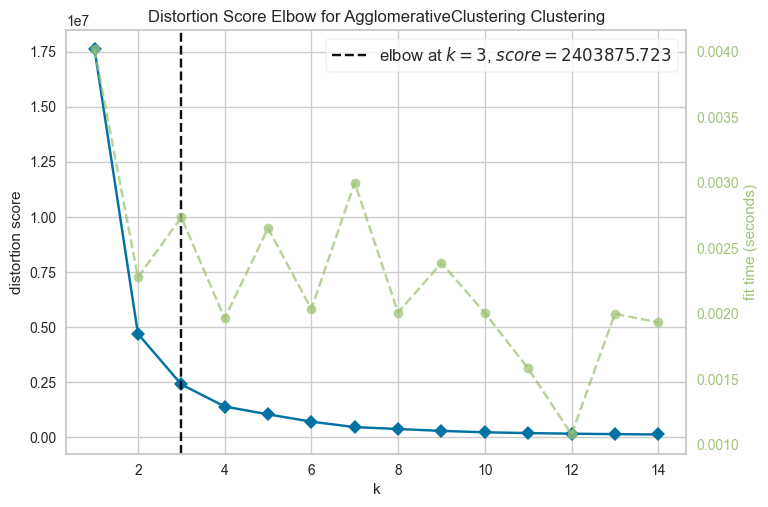

In [69]:
from sklearn.cluster import AgglomerativeClustering


modelo = AgglomerativeClustering()
visual = KElbowVisualizer(modelo, k=(1, 15), metric='distortion')
visual.fit(X)

visual.poof();


Distorsión: medida de cómo los puntos dentro de cada cluster están cerca unos de otros

El objetivo del gráfico es encontrar el codo, donde la disminución en la distorsión disminuye

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [70]:
from sklearn.decomposition import PCA    # PCA

import warnings
warnings.simplefilter('ignore')

In [73]:
pca = PCA()

pca.fit(X)

PCA()

Me pierdo... :(

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.